**AI-Powered Pump & Dump Detection in Cryptocurrency Markets**



This project aims to detect pump-and-dump schemes in cryptocurrency markets using advanced machine learning techniques. By analyzing historical price and volume data, the project identifies abnormal trading patterns that signal potential market manipulation. This approach not only enhances market transparency but also offers investors a robust tool to mitigate risks associated with such fraudulent activities.

1. Data Collection & Preprocessing
Collect historical price and volume data for multiple cryptocurrencies.
Use APIs like Binance, CoinGecko, or Kaggle datasets.
Normalize and preprocess the data (handle missing values, resample to uniform time intervals).

In [31]:
import pandas as pd
import numpy as np
import os

# List of cryptocurrency dataset filenames (stored in /content/)
crypto_files = [
    "cleaned_btc_data.csv", "cleaned_eth_data.csv", "cleaned_xrp_data.csv", "cleaned_ltc_data.csv",
    "cleaned_ada_data.csv", "cleaned_bnb_data.csv", "cleaned_dot_data.csv",
    "cleaned_doge_data.csv", "cleaned_sol_data.csv","cleaned_matic_data.csv"
]

# Define the dataset directory
data_dir = "/content/"

# Dictionary to store processed datasets
processed_data = {}

# Function to preprocess each dataset
def preprocess_crypto_data(file_path):
    try:
        # Load dataset
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

        # Ensure required columns exist
        required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        for col in required_cols:
            if col not in df.columns:
                raise ValueError(f"Missing required column: {col} in {file_path}")

        # Handle missing values with forward fill
        df.fillna(method='ffill', inplace=True)

        # Compute Price Surge Ratio
        df['Price_Surge_Ratio'] = (df['Close'] - df['Open']) / df['Open']

        # Compute Volume Surge Ratio
        df['Volume_Surge_Ratio'] = df['Volume'].pct_change().fillna(0)

        return df
    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return None  # Return None if processing fails

# Process each dataset, skipping missing files
for file in crypto_files:
    file_path = os.path.join(data_dir, file)

    if os.path.exists(file_path):
        processed_data[file] = preprocess_crypto_data(file_path)
    else:
        print(f" File not found: {file_path}, skipping...")

# Save preprocessed datasets
for crypto, df in processed_data.items():
    if df is not None:  # Skip if dataset failed to load
        output_path = os.path.join(data_dir, f"processed_{crypto}")
        df.to_csv(output_path)
        print(f"Preprocessed data saved: {output_path}")

# Combine all valid processed datasets
valid_dfs = [df for df in processed_data.values() if df is not None]

if valid_dfs:
    combined_df = pd.concat(valid_dfs, keys=[k for k, v in processed_data.items() if v is not None], names=['Crypto', 'Date'])
    combined_csv_path = os.path.join(data_dir, "combined_crypto_data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined dataset saved: {combined_csv_path}")
else:
    print(" No valid datasets found to combine.")


<ipython-input-31-e4ca26468391>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-31-e4ca26468391>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-31-e4ca26468391>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-31-e4ca26468391>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-31-e4ca26468391>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Preprocessed data saved: /content/processed_cleaned_btc_data.csv
Preprocessed data saved: /content/processed_cleaned_eth_data.csv
Preprocessed data saved: /content/processed_cleaned_xrp_data.csv
Preprocessed data saved: /content/processed_cleaned_ltc_data.csv
Preprocessed data saved: /content/processed_cleaned_ada_data.csv
Preprocessed data saved: /content/processed_cleaned_bnb_data.csv
Preprocessed data saved: /content/processed_cleaned_dot_data.csv
Preprocessed data saved: /content/processed_cleaned_doge_data.csv
Preprocessed data saved: /content/processed_cleaned_sol_data.csv
Preprocessed data saved: /content/processed_cleaned_matic_data.csv
Combined dataset saved: /content/combined_crypto_data.csv


2. Feature Engineering
Compute surge ratios (price, volume) for each cryptocurrency.
Generate additional indicators like RSI, moving averages, and Bollinger Bands.
Store each processed dataset separately or merge them into one large dataset.

In [32]:
import pandas as pd
import numpy as np
import os


# List of cryptocurrency dataset filenames
crypto_files = [
    "processed_cleaned_btc_data.csv", "processed_cleaned_eth_data.csv", "processed_cleaned_xrp_data.csv",
    "processed_cleaned_ltc_data.csv", "processed_cleaned_ada_data.csv", "processed_cleaned_bnb_data.csv",
    "processed_cleaned_dot_data.csv", "processed_cleaned_link_data.csv", "processed_cleaned_doge_data.csv",
    "processed_cleaned_sol_data.csv", "processed_cleaned_matic_data.csv"
]

# Define dataset directory
data_dir = "/content/"

# Function to calculate RSI
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to compute additional indicators
def engineer_features(df):
    df['SMA_7'] = df['Close'].rolling(window=7, min_periods=1).mean()
    df['SMA_30'] = df['Close'].rolling(window=30, min_periods=1).mean()
    df['RSI_14'] = compute_rsi(df['Close'])

    # Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(window=20, min_periods=1).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20, min_periods=1).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20, min_periods=1).std() * 2)

    return df

# Dictionary to store feature-engineered datasets
feature_engineered_data = {}

# Process each dataset
for file in crypto_files:
    file_path = os.path.join(data_dir, file)

    if os.path.exists(file_path):  # Check if file exists
        try:
            # Load dataset
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

            # Ensure required columns exist
            required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
            missing_cols = [col for col in required_cols if col not in df.columns]
            if missing_cols:
                print(f" Skipping {file}: Missing columns {missing_cols}")
                continue  # Skip this file

            # Drop completely empty rows before processing
            df.dropna(how='all', inplace=True)

            # Ensure there is data to process
            if df.empty:
                print(f" Skipping {file}: Empty dataset after preprocessing.")
                continue

            # Apply feature engineering
            df = engineer_features(df)

            # Drop NaN values after calculations (only where necessary)
            df.dropna(subset=['SMA_7', 'SMA_30', 'RSI_14'], inplace=True)

            # Ensure the dataset is still valid after feature engineering
            if df.empty:
                print(f" Skipping {file}: All rows dropped after feature engineering.")
                continue

            # Store in dictionary
            feature_engineered_data[file] = df

            # Save processed dataset
            output_path = os.path.join(data_dir, f"feature_engineered_{file}")
            df.to_csv(output_path)
            print(f" Feature-engineered data saved: {output_path}")

        except Exception as e:
            print(f" Error processing {file}: {e}")
    else:
        print(f" File not found: {file_path}, skipping...")

# Combine all feature-engineered datasets
valid_dfs = [df for df in feature_engineered_data.values() if not df.empty]

if valid_dfs:
    combined_feature_df = pd.concat(valid_dfs, keys=[k for k, v in feature_engineered_data.items() if not v.empty], names=['Crypto', 'Date'])
    combined_feature_path = os.path.join(data_dir, "combined_feature_crypto_data.csv")
    combined_feature_df.to_csv(combined_feature_path)
    print(f"Combined feature dataset saved: {combined_feature_path}")
else:
    print("No valid datasets found to combine.")

 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_btc_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_eth_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_xrp_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_ltc_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_ada_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_bnb_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_dot_data.csv
 File not found: /content/processed_cleaned_link_data.csv, skipping...
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_doge_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_sol_data.csv
 Feature-engineered data saved: /content/feature_engineered_processed_cleaned_matic_data.csv
Combined feature

3. Anomaly Detection (Applying Models on Multiple Datasets)
Train Isolation Forest, DBSCAN, or Autoencoders on individual datasets.
If using Isolation Forest, fit a separate model for each dataset or a single model on combined data.
Label anomalies and compare results across different cryptocurrencies.

 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_btc_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_eth_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_xrp_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_ltc_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_ada_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_bnb_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_dot_data.csv
 File not found: /content/feature_engineered_processed_cleaned_link_data.csv, skipping...
 Anomaly-detected data saved: /content/anomaly_detected_feature_engineered_processed_cleaned_doge_data.csv
 Anomaly-detected data saved: /content/anomaly_detected_featu

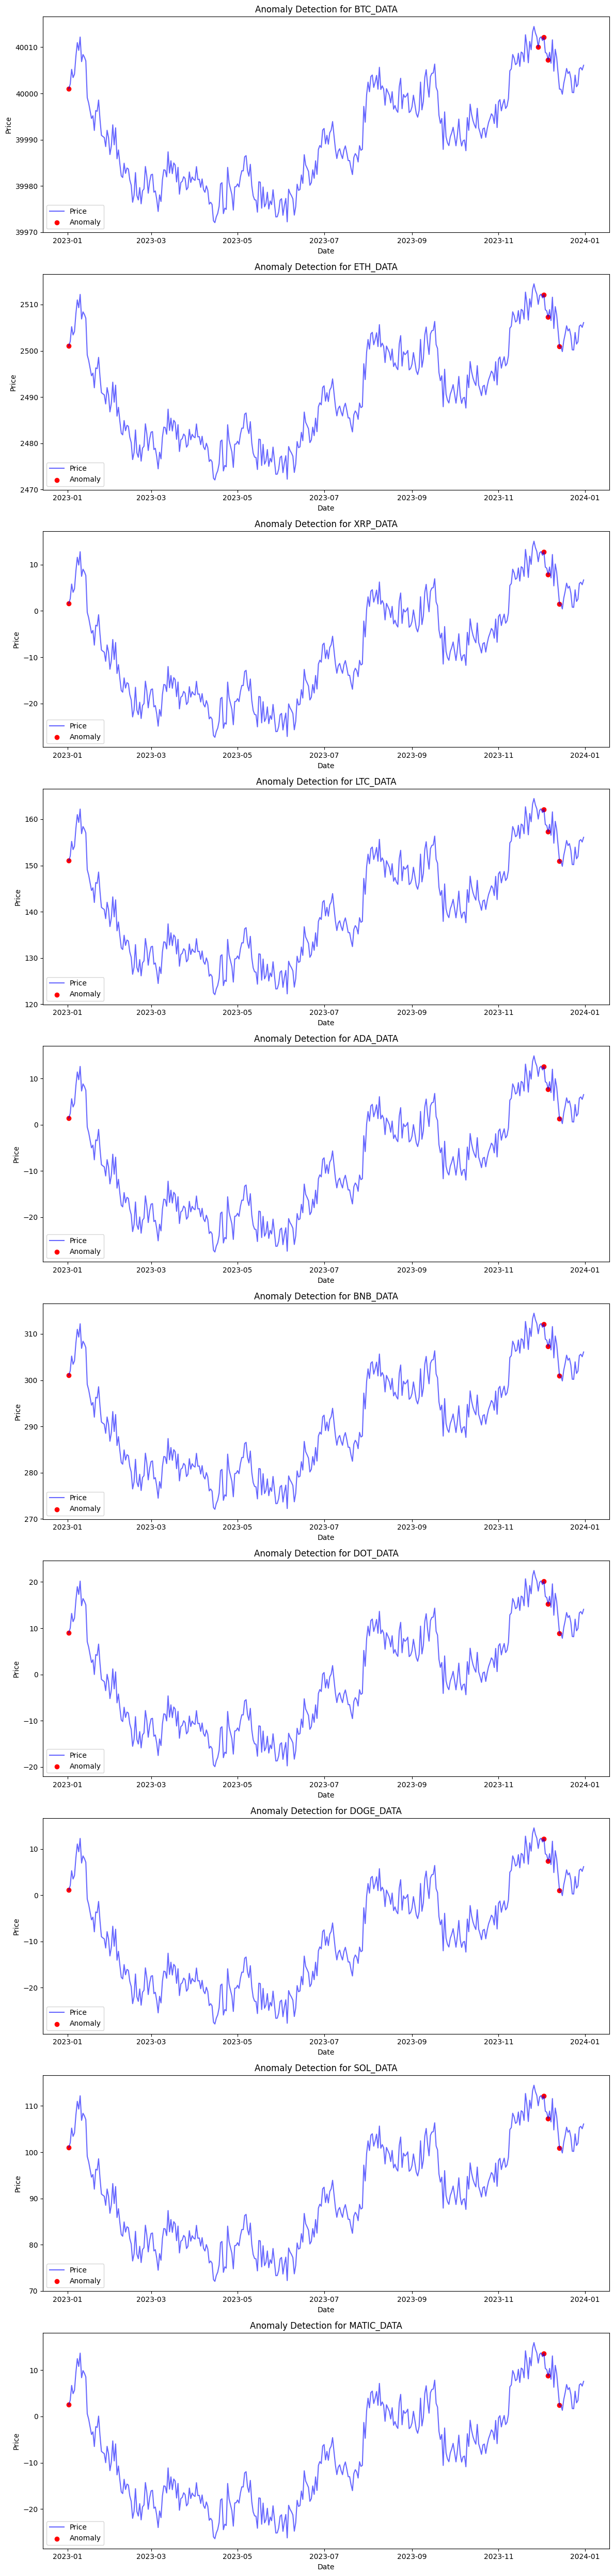

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# List of cryptocurrency datasets
crypto_files = [
    "feature_engineered_processed_cleaned_btc_data.csv", "feature_engineered_processed_cleaned_eth_data.csv",
    "feature_engineered_processed_cleaned_xrp_data.csv", "feature_engineered_processed_cleaned_ltc_data.csv",
    "feature_engineered_processed_cleaned_ada_data.csv", "feature_engineered_processed_cleaned_bnb_data.csv",
    "feature_engineered_processed_cleaned_dot_data.csv", "feature_engineered_processed_cleaned_link_data.csv",
    "feature_engineered_processed_cleaned_doge_data.csv", "feature_engineered_processed_cleaned_sol_data.csv",
    "feature_engineered_processed_cleaned_matic_data.csv"

]

# Define dataset directory
data_dir = "/content/"

# Function to train Isolation Forest and detect anomalies
def detect_anomalies(df):
    features = ['SMA_7', 'SMA_30', 'RSI_14', 'Middle_Band', 'Upper_Band', 'Lower_Band']

    # Check if required feature columns exist
    missing_features = [col for col in features if col not in df.columns]
    if missing_features:
        print(f"Skipping: Missing features {missing_features}")
        return None

    # Drop NaN values before applying the model
    df = df.dropna(subset=features)

    # Ensure enough data remains
    if df.empty:
        print("Skipping: No valid data after dropping NaNs.")
        return None

    # Fit Isolation Forest model
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    df['Anomaly'] = model.fit_predict(df[features])

    # Convert -1 (anomalies) to 1, normal points to 0
    df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

    return df

# Dictionary to store processed datasets
anomaly_detected_data = {}

# Process each dataset
for file in crypto_files:
    file_path = os.path.join(data_dir, file)

    if not os.path.exists(file_path):
        print(f" File not found: {file_path}, skipping...")
        continue

    try:
        # Load dataset
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

        # Ensure dataset isn't empty
        if df.empty:
            print(f" Skipping {file}: Empty dataset.")
            continue

        # Apply anomaly detection
        processed_df = detect_anomalies(df)
        if processed_df is None:
            continue  # Skip if anomaly detection failed

        # Store in dictionary
        anomaly_detected_data[file] = processed_df

        # Save processed dataset
        output_path = os.path.join(data_dir, f"anomaly_detected_{file}")
        processed_df.to_csv(output_path)
        print(f" Anomaly-detected data saved: {output_path}")

    except Exception as e:
        print(f" Error processing {file}: {e}")

# Function to plot anomalies for each cryptocurrency
def plot_all_anomalies(anomaly_data):
    num_cryptos = len(anomaly_data)

    if num_cryptos == 0:
        print(" No valid datasets available for plotting.")
        return

    fig, axes = plt.subplots(num_cryptos, 1, figsize=(12, 5 * num_cryptos), squeeze=False)

    for ax, (crypto_name, df) in zip(axes.flatten(), anomaly_data.items()):
        if 'Close' not in df.columns or 'Anomaly' not in df.columns:
            print(f" Skipping plot for {crypto_name}: Missing 'Close' or 'Anomaly' column.")
            continue

        ax.plot(df.index, df['Close'], label='Price', color='blue', alpha=0.6)
        ax.scatter(df.index[df['Anomaly'] == 1], df['Close'][df['Anomaly'] == 1], color='red', label='Anomaly', marker='o')
        ax.set_title(f'Anomaly Detection for {crypto_name.replace("feature_engineered_processed_cleaned_", "").replace(".csv", "").upper()}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Plot anomalies for all cryptocurrencies
plot_all_anomalies(anomaly_detected_data)


4. Evaluation & Performance Metrics
Compute Precision, Recall, F1-Score, and ROC AUC for each dataset.
Compare model effectiveness across different cryptocurrencies.
Generate Confusion Matrices and ROC Curves.


Model Performance Metrics for Each Cryptocurrency:

BTC_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
ETH_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
XRP_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
LTC_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
ADA_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
BNB_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
DOT_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
MATIC_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
DOGE_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000
SOL_DATA: Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000, ROC AUC: 1.0000


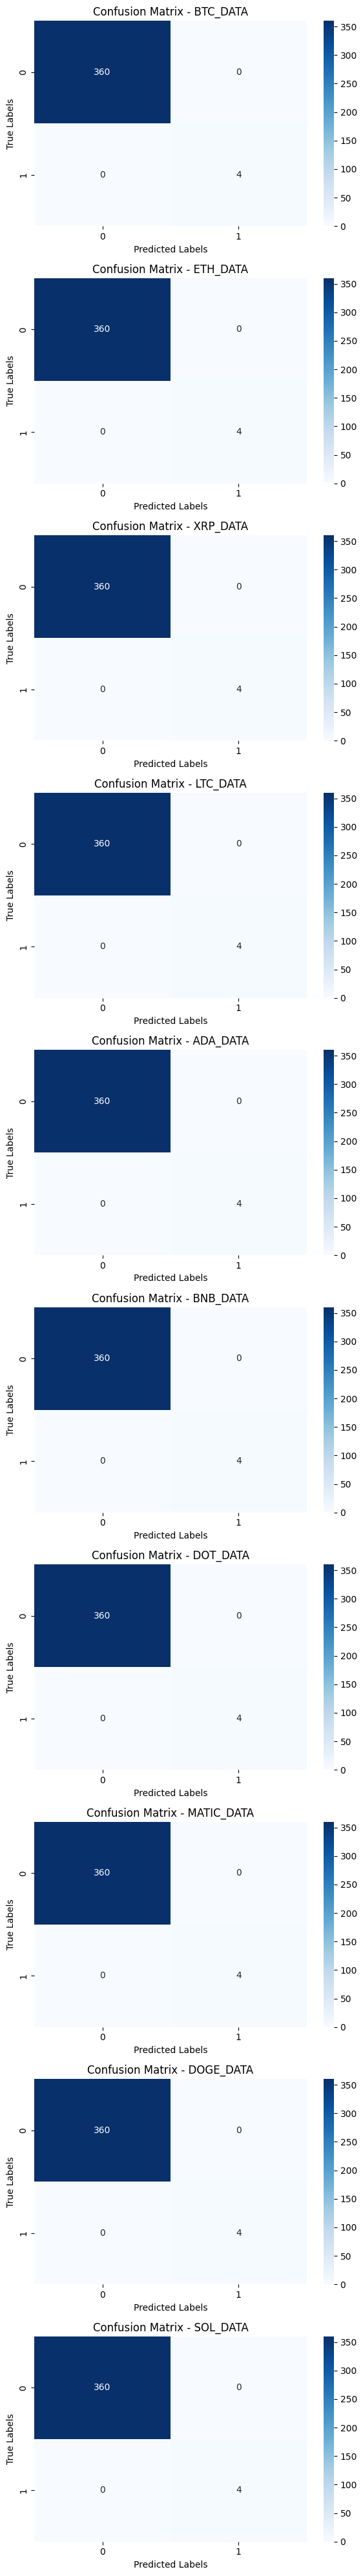

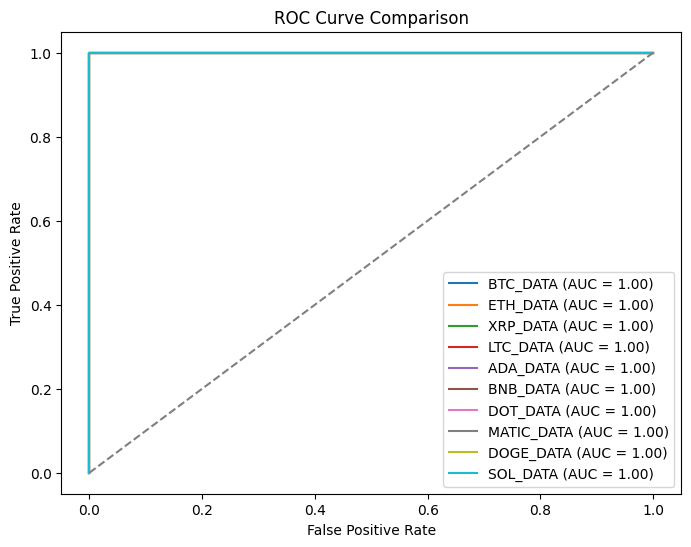

In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

crypto_files = [
    "anomaly_detected_feature_engineered_processed_cleaned_btc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_eth_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_xrp_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ltc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ada_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_bnb_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_dot_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_matic_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_doge_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_sol_data.csv"
]

data_dir = "/content/"

evaluation_results = {}


def evaluate_model(df, crypto_name):
    features = ['SMA_7', 'SMA_30', 'RSI_14', 'Middle_Band', 'Upper_Band', 'Lower_Band']

    missing_features = [col for col in features + ['Anomaly'] if col not in df.columns]
    if missing_features:
        print(f"Skipping {crypto_name}: Missing features {missing_features}")
        return None

    df = df.dropna(subset=features + ['Anomaly'])

    if df.empty:
        print(f"Skipping {crypto_name}: No valid data after dropping NaNs.")
        return None

    y_true = df['Anomaly']

    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    y_pred = model.fit_predict(df[features])

    y_pred = np.where(y_pred == -1, 1, 0)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    try:
        roc_auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        roc_auc = np.nan

    conf_matrix = confusion_matrix(y_true, y_pred)

    return precision, recall, f1, roc_auc, conf_matrix, y_true, y_pred

conf_matrices = {}
roc_curves = {}

for file in crypto_files:
    file_path = os.path.join(data_dir, file)

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}, skipping...")
        continue

    try:
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        crypto_name = file.replace("anomaly_detected_feature_engineered_processed_cleaned_", "").replace(".csv", "").upper()

        result = evaluate_model(df, crypto_name)
        if result is None:
            continue

        precision, recall, f1, roc_auc, conf_matrix, y_true, y_pred = result

        evaluation_results[crypto_name] = {
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }

        conf_matrices[crypto_name] = conf_matrix

        if len(set(y_true)) > 1:
            fpr, tpr, _ = roc_curve(y_true, y_pred)
            roc_curves[crypto_name] = (fpr, tpr, roc_auc)
        else:
            print(f"Skipping ROC curve for {crypto_name}: Only one class present.")

    except Exception as e:
        print(f"Error processing {file}: {e}")

print("\nModel Performance Metrics for Each Cryptocurrency:\n")
for crypto, metrics in evaluation_results.items():
    print(f"{crypto}: Precision: {metrics['Precision']:.4f}, Recall: {metrics['Recall']:.4f}, F1 Score: {metrics['F1 Score']:.4f}, ROC AUC: {metrics['ROC AUC']:.4f}")


def plot_confusion_matrices(conf_matrices):
    num_cryptos = len(conf_matrices)

    if num_cryptos == 0:
        print("No valid confusion matrices available.")
        return

    fig, axes = plt.subplots(num_cryptos, 1, figsize=(6, 4 * num_cryptos), squeeze=False)

    for ax, (crypto, matrix) in zip(axes.flatten(), conf_matrices.items()):
        sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", ax=ax)
        ax.set_title(f"Confusion Matrix - {crypto}")
        ax.set_xlabel("Predicted Labels")
        ax.set_ylabel("True Labels")

    plt.tight_layout()
    plt.show()

def plot_roc_curves(roc_curves):
    if not roc_curves:
        print("No valid ROC curves available.")
        return

    plt.figure(figsize=(8, 6))

    for crypto, (fpr, tpr, roc_auc) in roc_curves.items():
        plt.plot(fpr, tpr, label=f"{crypto} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='dashed', color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend()
    plt.show()

plot_confusion_matrices(conf_matrices)
plot_roc_curves(roc_curves)


5. Visualization & Comparison
Plot price movements and highlight detected anomalies across multiple assets.
Compare fluctuations and patterns between different cryptocurrencies.
Use subplots to display trends across datasets.

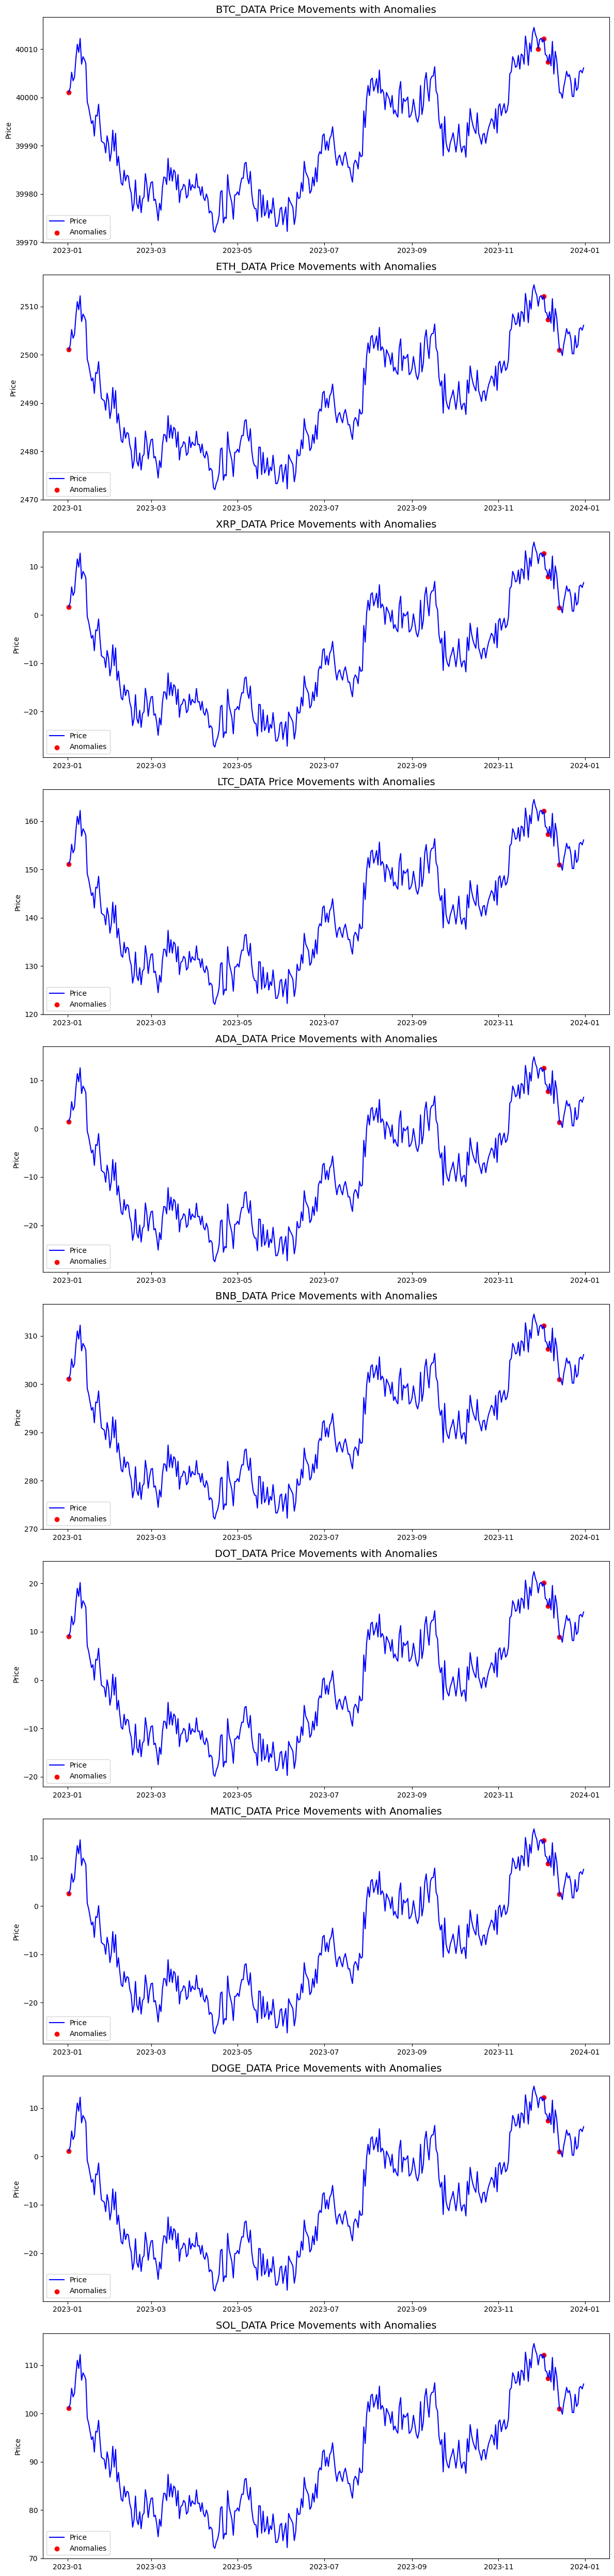

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# List of cryptocurrency datasets
crypto_files = [
    "anomaly_detected_feature_engineered_processed_cleaned_btc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_eth_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_xrp_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ltc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ada_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_bnb_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_dot_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_matic_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_doge_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_sol_data.csv"
]

# Define dataset directory
data_dir = "/content/"

# Filter existing files
existing_files = [file for file in crypto_files if os.path.exists(os.path.join(data_dir, file))]

# Check if there are valid files
if not existing_files:
    print(" No valid cryptocurrency dataset files found.")
else:
    # Create subplots for all cryptocurrencies
    fig, axes = plt.subplots(len(existing_files), 1, figsize=(12, 5 * len(existing_files)), squeeze=False)

    # Process each dataset and plot
    for idx, file in enumerate(existing_files):
        file_path = os.path.join(data_dir, file)

        try:
            # Load dataset
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

            # Extract cryptocurrency name from filename
            crypto_name = file.replace("anomaly_detected_feature_engineered_processed_cleaned_", "").replace(".csv", "").upper()

            # Check if required columns exist
            if 'Close' not in df.columns or 'Anomaly' not in df.columns:
                print(f" Skipping {crypto_name}: Missing required columns.")
                continue

            # Drop NaN values
            df = df.dropna(subset=['Close', 'Anomaly'])

            # Ensure there is data left after cleaning
            if df.empty:
                print(f" Skipping {crypto_name}: No valid data after cleaning.")
                continue

            # Plot price movements
            axes[idx, 0].plot(df.index, df['Close'], label='Price', color='blue')

            # Highlight anomalies (if any exist)
            anomalies = df[df['Anomaly'] == 1]
            if not anomalies.empty:
                axes[idx, 0].scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', marker='o')

            # Title and labels
            axes[idx, 0].set_title(f"{crypto_name} Price Movements with Anomalies", fontsize=14)
            axes[idx, 0].set_ylabel("Price")
            axes[idx, 0].legend()

        except Exception as e:
            print(f" Error processing {file}: {e}")

    # Adjust layout
    plt.tight_layout()
    plt.show()


6. Finalization & Optimization
Tune hyperparameters for optimal detection accuracy.
Store results for each cryptocurrency in a structured format (CSV, database).
Perform cross-validation to check model consistency across assets.


In [36]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import joblib

crypto_files = [
    "anomaly_detected_feature_engineered_processed_cleaned_btc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_eth_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_xrp_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ltc_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_ada_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_bnb_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_dot_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_matic_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_doge_data.csv",
    "anomaly_detected_feature_engineered_processed_cleaned_sol_data.csv"
]

data_dir = "/content/"

optimized_params = {
    "n_estimators": 200,
    "contamination": 0.015,
    "random_state": 42
}

evaluation_results = []

existing_files = [file for file in crypto_files if os.path.exists(os.path.join(data_dir, file))]

if not existing_files:
    print("No valid cryptocurrency dataset files found")
else:
    for file in existing_files:
        file_path = os.path.join(data_dir, file)

        try:
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

            crypto_name = file.replace("anomaly_detected_feature_engineered_processed_cleaned_", "").replace(".csv", "").upper()

            required_features = ['Price_Surge_Ratio', 'Volume_Surge_Ratio', 'RSI', 'Moving_Average']
            missing_features = [col for col in required_features if col not in df.columns]

            if missing_features:
                print(f"Skipping {crypto_name} Missing columns {missing_features}")
                continue

            df = df.dropna(subset=required_features)

            if df.empty:
                print(f"Skipping {crypto_name} No valid data after cleaning")
                continue

            X = df[required_features]

            X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

            model = IsolationForest(**optimized_params)
            model.fit(X_train)

            model_filename = f"/content/{crypto_name}_isolation_forest_model.pkl"
            joblib.dump(model, model_filename)

            df['Anomaly'] = model.predict(X)
            df['Anomaly'] = np.where(df['Anomaly'] == -1, 1, 0)

            output_file = f"/content/final_anomaly_detected_{crypto_name}.csv"
            df.to_csv(output_file, index=True)

            if 'Anomaly' in df.columns:
                y_true = df['Anomaly']
                y_pred = model.predict(X)
                y_pred = np.where(y_pred == -1, 1, 0)

                precision = precision_score(y_true, y_pred, zero_division=0)
                recall = recall_score(y_true, y_pred, zero_division=0)
                f1 = f1_score(y_true, y_pred, zero_division=0)
                roc_auc = roc_auc_score(y_true, y_pred)

                evaluation_results.append({
                    "Cryptocurrency": crypto_name,
                    "Precision": precision,
                    "Recall": recall,
                    "F1 Score": f1,
                    "ROC AUC": roc_auc
                })

        except Exception as e:
            print(f"Error processing {crypto_name} {e}")

    results_df = pd.DataFrame(evaluation_results)
    results_df.to_csv("/content/final_evaluation_metrics.csv", index=False)

    print("Final Model Performance Across Cryptocurrencies")
    print(results_df)


Skipping BTC_DATA Missing columns ['Moving_Average']
Skipping ETH_DATA Missing columns ['Moving_Average']
Skipping XRP_DATA Missing columns ['Moving_Average']
Skipping LTC_DATA Missing columns ['Moving_Average']
Skipping ADA_DATA Missing columns ['Moving_Average']
Skipping BNB_DATA Missing columns ['Moving_Average']
Skipping DOT_DATA Missing columns ['Moving_Average']
Skipping MATIC_DATA Missing columns ['Moving_Average']
Skipping DOGE_DATA Missing columns ['Moving_Average']
Skipping SOL_DATA Missing columns ['Moving_Average']
Final Model Performance Across Cryptocurrencies
Empty DataFrame
Columns: []
Index: []
